In [1]:
import os

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
    
os.getcwd()

'/home/zack/personal/prediction_market_tools'

In [2]:
import pandas as pd

In [3]:
p = pd.read_csv('data/raw/predsnprices.csv')

In [4]:
from src import expected_value

In [5]:
p, latest_p = expected_value.prep_prices_csv(p)

/home/zack/personal/prediction_market_tools/src/expected_value.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_p["buyYes"] = latest_p.myBet > latest_p.yesPrice
/home/zack/miniconda3/envs/preds/lib/python3.9/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/zack/personal/prediction_market_tools/src/expected_value.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [6]:
latest_p

,symbol,date,yesPrice,noPrice,myBet,purchase,qty,buyYes,mktp,myp,mktq,myq,expected_value
6,VOHC-001,2021-09-14,0.36,0.66,0.25,n,98.0,False,0.66,0.75,0.34,0.25,0.09
7,NYSCHL-001,2021-09-14,0.84,0.17,0.90,y,125.0,True,0.84,0.90,0.16,0.10,0.06
9,CASE-038,2021-09-14,0.07,0.95,0.05,NaN,NaN,False,0.95,0.95,0.05,0.05,0.00
14,CASE-039,2021-09-15,0.06,NaN,0.05,NaN,NaN,False,NaN,0.95,NaN,0.05,NaN
16,CASE-040,2021-09-16,0.98,0.03,1.00,NaN,NaN,True,0.98,1.00,0.02,0.00,0.02
18,WKCASE-004,2021-09-16,0.99,0.02,1.00,NaN,NaN,True,0.99,1.00,0.01,0.00,0.01
20,CASE-041,2021-09-17,0.50,0.50,0.70,NaN,NaN,True,0.50,0.70,0.50,0.30,0.20
21,CASE-042,2021-09-17,0.34,0.66,0.25,NaN,NaN,False,0.66,0.75,0.34,0.25,0.09
22,CASE-042,2021-09-17,0.81,0.21,0.75,NaN,NaN,False,0.21,0.25,0.79,0.75,0.04
23,CASE-042,2021-09-17,NaN,0.65,0.90,NaN,NaN,False,0.65,0.10,0.35,0.90,-0.55


In [7]:
from src import kalshi

In [8]:
k = kalshi.Kalshi()

In [9]:
k.login()

In [10]:
positions = k.get_open_positions()
positions

,user_id,market_id,position,position_cost,resting_orders_count,total_cost,realized_pnl,fees_paid,volume,final_position,final_position_cost,qty,id,ticker_name,last_price,status,mrkt_prob
0,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,654e1b59-9979-403d-af50-35434a440e1b,69,5.52,0,552,0,37,69,0,0,69,654e1b59-9979-403d-af50-35434a440e1b,LCASE-001,4,active,0.04
2,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,2f485e17-27ac-4337-ad04-d63a9fc578ad,-98,64.68,0,6468,0,154,98,0,0,98,2f485e17-27ac-4337-ad04-d63a9fc578ad,VOHC-001,26,active,0.74
3,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,c549ccac-ad50-4f41-a1d1-771745ee97e5,125,105.00,0,10500,0,119,125,0,0,125,c549ccac-ad50-4f41-a1d1-771745ee97e5,NYSCHL-001,84,active,0.84
5,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,1459b052-de7f-4336-aacf-081bba01c54b,-50,42.50,0,4250,0,45,50,0,0,50,1459b052-de7f-4336-aacf-081bba01c54b,RAINNYC-009,15,active,0.85


In [11]:
positions = kalshi.merge_bets(positions, latest_p)

In [12]:
exp, mkt_situations = expected_value.compute_wager_expectations(positions.mrkt_prob, positions.position_cost, positions.qty)

# Market Expectation

In [13]:
exp

5.079999999999989

In [14]:
mkt_situations

,hits,hit_percent,hits_p,hits_exp
0,0,0.00,0.005990,-217.700000
1,1,0.25,0.082694,-129.222870
2,2,0.50,0.367774,-38.273595
3,3,0.75,0.522406,54.591905
4,4,1.00,0.021134,124.300000


# My Expectation

In [15]:
exp, my_situations = expected_value.compute_wager_expectations(positions.myBet, positions.position_cost, positions.qty)

In [16]:
exp

20.200000000000006

In [17]:
my_situations

,hits,hit_percent,hits_p,hits_exp
0,0,0.00,0.00225,-217.700000
1,1,0.25,0.04750,-128.805263
2,2,0.50,0.30900,-38.860194
3,3,0.75,0.58050,53.858140
4,4,1.00,0.06075,124.300000


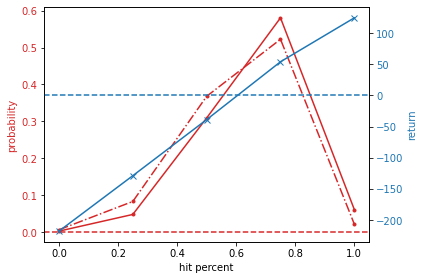

In [18]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('hit percent')
ax1.set_ylabel('probability', color=color)
ax1.plot(my_situations.hit_percent, my_situations.hits_p, color=color, marker='.')
ax1.plot(mkt_situations.hit_percent, mkt_situations.hits_p, color=color, marker='.', linestyle='-.')
ax1.axhline(y=0, linestyle='--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('return', color=color)  # we already handled the x-label with ax1
ax2.plot(my_situations.hit_percent, my_situations.hits_exp, color=color, marker='x')
ax2.axhline(y=0, linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()